In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Homework #1

<b>3.)</b> Which of the following is a random variable?

a. The population mean

b. The population size, N

c. The sample size, n

d. The sample mean

e. The variance of the sample mean

f. The largest value in the sample

g. The population variance

h. The estimated variance of the sample mean

<h3>d, e, f, h</h3>

<b>5.)</b> How would you respond to a friend who asks you, “How can we say that the
sample mean is a random variable when it is just a number, like the population
mean? For example, in Example A of Section 7.3.2, a simple random sample of size 50 produced x  ̄ = 938.5; how can the number 938.5 be a random
variable?”

<h3>I would say that the sample mean is a random variable because everytime we take a different sample we are likely to get a different random answer</h3>

<b>7.)</b> Suppose that a simple random sample is used to estimate the proportion of families
in a certain area that are living below the poverty level. If this proportion is roughly
.15, what sample size is necessary so that the standard error of the estimate is .02?

<h3>The standar error is defined as

$$\sigma_{\bar X} = \frac {\sigma}{\sqrt n}$$

We are given that $p = 0.15$ and therefore $\sigma^2 = p(1-p) = 0.1275$. Now we simply solve for n:

$$n = \lceil \frac {0.1275}{0.02 ^ 2}\rceil = \lceil 318.75 \rceil = 319$$



<b>16.)</b> True or false?

a. The center of a 95% confidence interval for the population mean is a random
variable.

<b>True</b>

b. A 95% confidence interval for μ contains the sample mean with probability
.95.

<b>False</b>

c. A 95% confidence interval contains 95% of the population.

<b>False</b>

d. Out of one hundred 95% confidence intervals for μ, 95 will contain μ.

<b>True, at least on average</b>

<b>17.)</b> A 90% confidence interval for the average number of children per household
based on a simple random sample is found to be (.7, 2.1). Can we conclude that
90% of households have between .7 and 2.1 children?

<b>No. We can say that with 90% confidence the average number of children per household is between that range, but this has nothing to do with the conclusions reached. 

We can show this with a simple script:</b>

In [20]:
N = 100
x = array([0 if i%9 == 0 else 1 for i in range(N)])
mu = mean(x)
sd = std(x)
from scipy.stats import norm
print(mu - norm.ppf(0.95)*sd, mu + norm.ppf(0.95)*sd)

0.345485838586 1.41451416141


<b>Where we know that in fact more than 10% of the population has a value of zero. Therefore the conclusions reached above must be invalid</b>

<b>21.)</b> In order to halve the width of a 95% confidence interval for a mean, by what factor
should the sample size be increased? Ignore the finite population correction.

<b> We must quadruple the sample size </b>

<b>22.)</b> An investigator quantifies her uncertainty about the estimate of a population mean
by reporting $\bar{X} ± s_{\bar{ X}}$ . What size confidence interval is this?

In [37]:
a = norm.cdf(1.96)
print(a, 1 -(1 -a)*2)
a = norm.cdf(1)
print(a,  1 -(1 -a)*2)

0.975002104852 0.950004209704
0.841344746069 0.682689492137


<b>Looks like a 68% confidence interval</b>

<b>24.)</b> For a random sample of size n from a population of size N , consider the following
as an estimate of μ:

$$\bar{X_c} = \sum_{i=1}^n c_i X_i $$


where the $c_i$ are fixed numbers and $X_1$ , . . . , $X_n$ is the sample.

a. Find a condition on the $c_i$ such that the estimate is unbiased.

<b> We know that $\bar{X}$ is unbiased, so the choice of $c_i$ = 1/n, will lead to an unbiased estimate</b>

b. Show that the choice of $c_i$ that minimizes the variances of the estimate subject
to this condition is $c_i$ = 1/n, where i = 1, . . . , n.

<b> I believe this comes from the Rao–Cramér inequality. The proof of it is beyond me at this point</b>




35.) A simple random sample of a population of size 2000 yields the following

25 values:

104
86
91
104
79

109
80
103
98
87

111
119
99
98
94

109
88
108
83
92

87
122
96
107
97


a. Calculate an unbiased estimate of the population mean.

In [40]:
x = """104 86 91 104 79
109 80 103 98 87
111 119 99 98 94
109 88 108 83 92
87 122 96 107 97"""
x = [int(i) for i in x.split()]
mean(x)

98.040000000000006

b. Calculate unbiased estimates of the population variance and Var($\bar{X}$ ).

In [44]:
s2 = sum((x-mean(x))**2)/(24)
s2

133.70666666666668

In [46]:
varX = (s2/25)*(1 - 25/2000)
varX

5.281413333333334

c. Give approximate 95% confidence intervals for the population mean and total.

In [47]:
print(mean(x) - 1.96*varX, mean(x) + 1.96*varX)
print(2000*(mean(x) - 1.96*varX), 2000*(mean(x) + 1.96*varX))

87.6884298667 108.391570133
175376.859733 216783.140267


58.) (Computer Exercise) Construct a population consisting of the integers from 1 to 100. Simulate the sampling distribution of the sample mean of a sample of size
12 by drawing 100 samples of size 12 and making a histogram of the results.

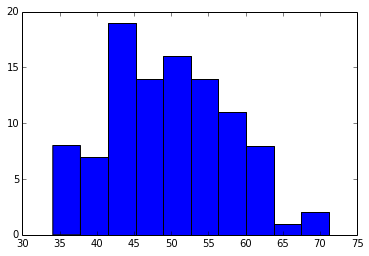

In [57]:
pop = [i+1 for i in range(100)]
means = []
for i in range(100):
    means.append(mean(np.random.choice(pop, 12, replace= False)))
hist(means);

<b>67.)</b> 

In these exercises, you will try to learn about the families of Cyberville by using
sampling.

a. Take a simple random sample of 500 families. Estimate the following population parameters, calculate the estimated standard errors of these estimates, and
form 95% confidence intervals:

In [58]:
import pandas as pd

In [79]:
df = pd.read_csv("Chapter 7/families.txt")
df.columns = ["TYPE", "PERSONS", "CHILDREN","INCOME","REGION","EDUCATION"]

In [96]:
samples = np.random.choice(len(df), 500, replace= False)
sample = df.ix[samples]

i. The proportion of female-headed families

In [97]:
female_head = sample["TYPE"] == 3
print("mean", mean(female_head))
print("estimated standard error", std(female_head)/sqrt(500))
print("confidence interval:", mean(female_head) - std(female_head)/sqrt(500),\
      mean(female_head) + std(female_head)/sqrt(500) )

mean 0.188
estimated standard error 0.0174731794474
confidence interval: 0.170526820553 0.205473179447


ii. The average number of children per family

In [99]:
avg_children = sample["CHILDREN"]
print("mean", mean(avg_children))
print("estimated standard error", std(avg_children)/sqrt(500))
print("confidence interval:", mean(avg_children) - std(avg_children)/sqrt(500),\
      mean(avg_children) + std(avg_children)/sqrt(500) )

mean 0.904
estimated standard error 0.049452684457
confidence interval: 0.854547315543 0.953452684457


iii. The proportion of heads of households who did not receive a high school
diploma

In [98]:
no_dip = sample["EDUCATION"]<39
print("mean", mean(no_dip))
print("estimated standard error", std(no_dip)/sqrt(500))
print("confidence interval:", mean(no_dip) - std(no_dip)/sqrt(500),\
      mean(no_dip) + std(no_dip)/sqrt(500) )

mean 0.21
estimated standard error 0.0182153781185
confidence interval: 0.191784621881 0.228215378119


iv. The average family income

In [100]:
income = sample["INCOME"]
print("mean", mean(income))
print("estimated standard error", std(income)/sqrt(500))
print("confidence interval:", mean(income) - std(income)/sqrt(500),\
      mean(income) + std(income)/sqrt(500) )

mean 38238.078
estimated standard error 1360.53244827
confidence interval: 36877.5455517 39598.6104483


Repeat the preceding parameters for five different simple random samples of
size 500 and compare the results.

In [103]:
for i in range(5):
    print("Sample", i+1)
    samples = np.random.choice(len(df), 500, replace= False)
    sample = df.ix[samples]
    female_head = sample["TYPE"] == 3
    print("Female head")
    print("mean", mean(female_head))
    print("estimated standard error", std(female_head)/sqrt(500))
    print("confidence interval:", mean(female_head) - std(female_head)/sqrt(500),\
          mean(female_head) + std(female_head)/sqrt(500) )
    avg_children = sample["CHILDREN"]
    print("average children")
    print("mean", mean(avg_children))
    print("estimated standard error", std(avg_children)/sqrt(500))
    print("confidence interval:", mean(avg_children) - std(avg_children)/sqrt(500),\
          mean(avg_children) + std(avg_children)/sqrt(500) )
    no_dip = sample["EDUCATION"]<39
    print("No diploma")
    print("mean", mean(no_dip))
    print("estimated standard error", std(no_dip)/sqrt(500))
    print("confidence interval:", mean(no_dip) - std(no_dip)/sqrt(500),\
          mean(no_dip) + std(no_dip)/sqrt(500) )
    income = sample["INCOME"]
    print("income")
    print("mean", mean(income))
    print("estimated standard error", std(income)/sqrt(500))
    print("confidence interval:", mean(income) - std(income)/sqrt(500),\
          mean(income) + std(income)/sqrt(500) )


Sample 1
Female head
mean 0.198
estimated standard error 0.0178211110765
confidence interval: 0.180178888924 0.215821111076
average children
mean 0.94
estimated standard error 0.0512328019925
confidence interval: 0.888767198008 0.991232801992
No diploma
mean 0.194
estimated standard error 0.0176841171677
confidence interval: 0.176315882832 0.211684117168
income
mean 41489.126
estimated standard error 1345.55708306
confidence interval: 40143.5689169 42834.6830831
Sample 2
Female head
mean 0.17
estimated standard error 0.0167988094816
confidence interval: 0.153201190518 0.186798809482
average children
mean 0.918
estimated standard error 0.0501851770944
confidence interval: 0.867814822906 0.968185177094
No diploma
mean 0.212
estimated standard error 0.0182787308093
confidence interval: 0.193721269191 0.230278730809
income
mean 42782.156
estimated standard error 1519.80338931
confidence interval: 41262.3526107 44301.9593893
Sample 3
Female head
mean 0.172
estimated standard error 0.0168769

<b>The results are roughly the same</b>

b. Take 100 samples of size 400.

In [105]:
all_samples = []
for i in range(100):
    samples = np.random.choice(len(df), 400, replace= False)
    sample = df.ix[samples]
    all_samples.append(sample)

i. For each sample, find the average family income.

In [107]:
income_avg = []
for x in all_samples:
    income_avg.append(mean(x["INCOME"]))

ii. Find the average and standard deviation of these 100 estimates and make
a histogram of the estimates.

41182.50695
1490.65039113


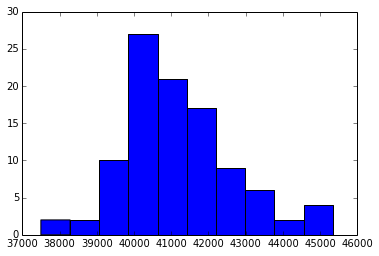

In [108]:
print(mean(income_avg))
print(std(income_avg))
hist(income_avg);

iii. Superimpose a plot of a normal density with that mean and standard devi-
ation of the histogram and comment on how well it appears to fit.

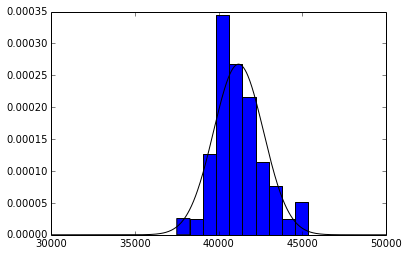

In [131]:
hist(income_avg, normed=True);
x = linspace(30000, 50000, 500)
plot(x,norm.pdf(x,41182, 1491), 'k');

iv. Plot the empirical cumulative distribution function (see Section 10.2). On
this plot, superimpose the normal cumulative distribution function with
mean and standard deviation as earlier. Comment on the fit.

v. Another method for examining a normal approximation is via a normal
probability plot (Section 9.9). Make such a plot and comment on what it
shows about the approximation.

vi. For each of the 100 samples, find a 95% confidence interval for the pop-
ulation average income. How many of those intervals actually contain the
population target?

vii. Take 100 samples of size 100. Compare the averages, standard deviations,
and histograms to those obtained for a sample of size 400 and explain how
the theory of simple random sampling relates to the comparisons.

c. For a simple random sample of 500, compare the incomes of the three family
types by comparing histograms and boxplots (see Chapter 10.6).
d. Take simple random samples of size 400 from each of the four regions.
i. Compare the incomes by region by making parallel boxplots.
ii. Does it appear that some regions have larger families than others?
iii. Are there differences in education level among the four regions?254
Chapter 7 Survey Sampling
e. Formulate a question of your choice and attempt to answer it with a simple
random sample of size 400.
f. Does stratification help in estimating the average family income? From a simple
random sample of size 400, estimate the average income and also the standard
error of your estimate. Form a 95% confidence interval. Next, allocate the 400
observations proportionally to the four regions and estimate the average income
from the stratified sample. Estimate the standard error and form a 95% confi-
dence interval. Compare your results to the results of the simple random sample.